<a href="https://colab.research.google.com/github/Preshynodis/EDA_US_Accidents/blob/main/Us_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
 import warnings
warnings.filterwarnings("ignore")

In [2]:
pip  install opendatasets --upgrade --quiet

# Download the data


In [3]:
import opendatasets as od

In [5]:
dataset="https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents"
od.download(dataset,force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nnodiprecious
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 231MB/s]


In [6]:
data_dir="./us-accidents/US_Accidents_Dec21_updated.csv"

#About the dataset

This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. Currently, there are about 2.8 million accident records in this dataset.


# Data Preparation and Cleaning
1. Load the file using Pandas 
2. Look at some information about the data and the columns 
3. Fix any missing or incorrect values 


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv(data_dir)

In [9]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [11]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [12]:
numerics =["int16", "int32", "int64", 'float16', "float32", "float64"]
num_df =df.select_dtypes(include=numerics)
len(num_df.columns)
#counting the numeric columns 

14

#Percentage of missing values per column

Text(0, 0.5, 'Columns')

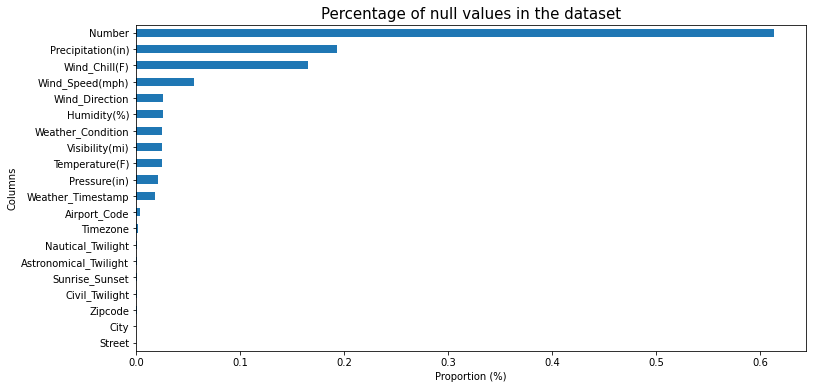

In [13]:
plt.figure(figsize=(12,6))
missing_percentages= df.isna().sum().sort_values(ascending=True)/ len(df) 
missing_percentages[missing_percentages != 0].plot(kind="barh")
plt.title("Percentage of null values in the dataset",size=15,color="black")
plt.xlabel('Proportion (%)')
plt.ylabel('Columns')
#filtered out coolumns with percentages of missing values equal to 0

In [14]:
df = df.drop("Number",axis=1)

- Dropped the "Number" column because it had over 60% missing values

# Columns we will analyze
1. City
2. Start time
3. Temperature
4. Weather Condition 
5. Severity
6. Humidity

# EDA and Visualization


In [15]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


- Severity with mean ~2, meaning accidents didn't have much impact on traffic 
- Average length of road affected by accidents is 7 miles


How many cities in dataset?

In [16]:
cities=df.City.unique()
print(cities)
print(len(cities))

['Dublin' 'Dayton' 'Cincinnati' ... 'Clarksdale' 'Bridgeboro'
 'American Fork-Pleasant Grove']
11682


- There are over 19000 cities in US, meanwhile 11682 present in dataset

In [17]:
cities_by_accidents= df["City"].value_counts().head(10)
cities_by_accidents
#getting cities with most accident cases

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

Text(0, 0.5, 'No. of cases')

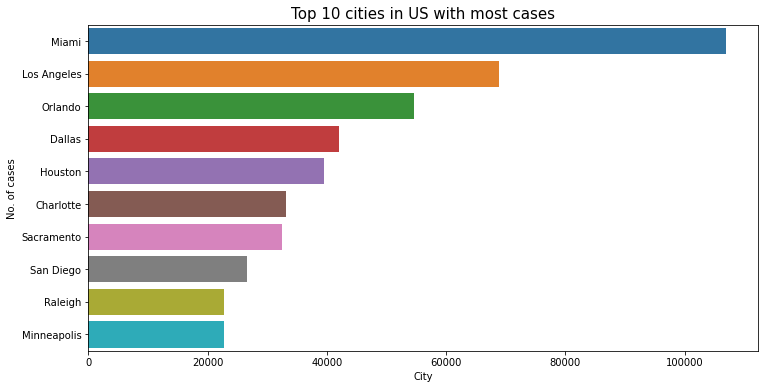

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x=cities_by_accidents, y= cities_by_accidents.index)
plt.title("Top 10 cities in US with most cases",size=15,color="black")
plt.xlabel('City')
plt.ylabel('No. of cases')

- Miami had the highest number of accident cases ; 106966

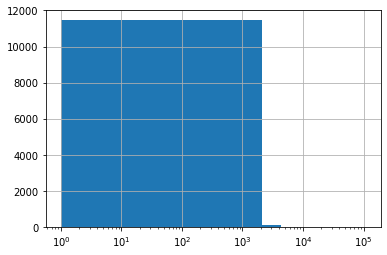

In [75]:
df["City"].value_counts().hist(bins=50)
plt.xscale("log")
plt.show()

- Plot shows majority of accidents in cities were less up to or less than 1000

Cities with the least number of accidents?

In [77]:
high_accident_cities =df["City"].value_counts()[df["City"].value_counts() >=1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]


In [69]:
city_acc= df["City"].value_counts()
city_acc.tail(20)
min_acc=city_acc[city_acc<1000]
min_acc.tail()

Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, dtype: int64

Text(0.5, 1.0, 'US cities with cases less than 1000')

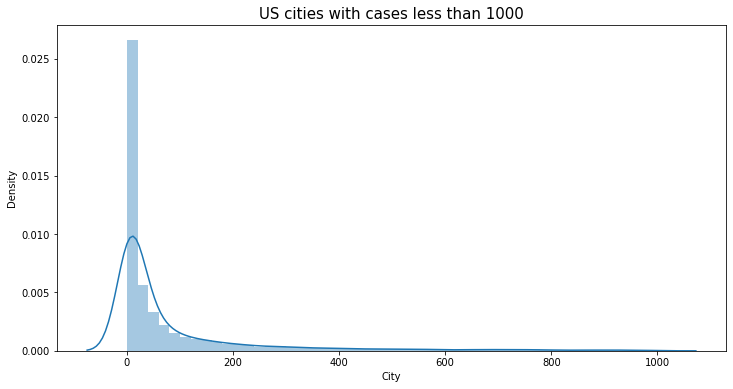

In [70]:
plt.figure(figsize=(12,6))
sns.distplot(min_acc)
plt.title("US cities with cases less than 1000",size=15,color="black")

In [71]:
len(high_accident_cities)/len(df.City)

3.5145160054573405e-06

Text(0.5, 1.0, 'Distribution showing number of cities with high accident counts')

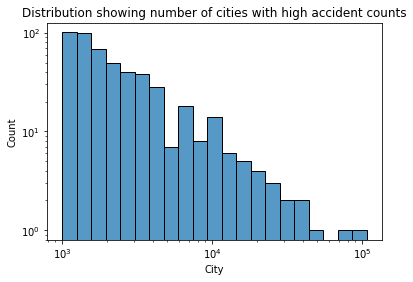

In [81]:
sns.histplot(high_accident_cities, log_scale= True)
plt.yscale("log")
plt.title("Distribution showing number of cities with high accident counts",size=12)

In [76]:
min_acc[min_acc == 1]
#length is 1110

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

- There are 1110 cities with accident record of 1

The most populated city is New York in US, it wasn't among cities with top recorded accidents

In [26]:
print("New York" in df.City.unique())
print("NY" in df.State.unique())

True
True


Which states had frequent accident records?

In [27]:
state_acc=df['State'].value_counts()
state_top=state_acc.head(10)
state_top

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
Name: State, dtype: int64

Text(0, 0.5, 'Case counts')

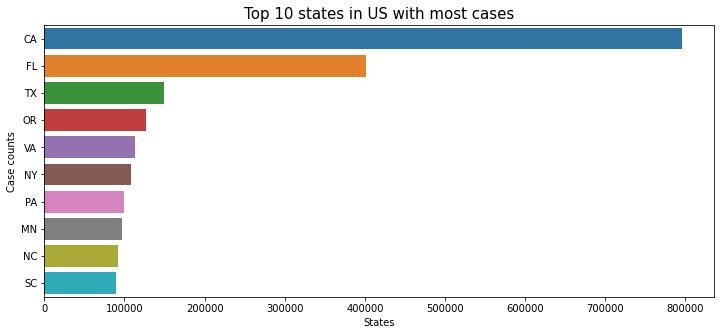

In [64]:
plt.figure(figsize=(12,5))
sns.barplot(y=state_top.index, x=state_top)
plt.title("Top 10 states in US with most cases",size=15,color="black")
plt.xlabel('States')
plt.ylabel('Case counts')

- CA as in California had most accidents of 795868 followed by FL(Florida)
- The top 2 cities are also cities in top 2 states with high accidents

Which streets are prone to accidents?

In [29]:
street_acc=df['Street'].value_counts()
max_acc=street_acc.head(10)
max_acc

I-95 N     39853
I-5 N      39402
I-95 S     36425
I-5 S      30229
I-10 E     26164
I-10 W     25298
I-80 W     17545
I-80 E     16873
I-405 N    13708
I-15 N     12675
Name: Street, dtype: int64

Text(0, 0.5, 'No. of accidents')

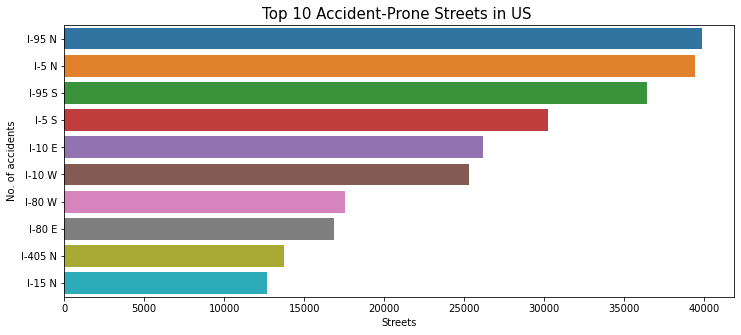

In [30]:
plt.figure(figsize=(12,5))
sns.barplot(y=max_acc.index, x=max_acc)
plt.title("Top 10 Accident-Prone Streets in US ",size=15,color="black")
plt.xlabel('Streets')
plt.ylabel('No. of accidents')

- I-95 N with maximum number of accidents can be termed "Accident-prone street"

What time of the day did the accidents occur?

In [31]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [32]:
df["Start_Time"]=pd.to_datetime(df.Start_Time)

In [33]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

<Figure size 864x576 with 0 Axes>

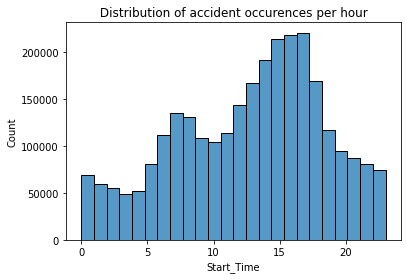

<Figure size 864x576 with 0 Axes>

In [34]:
sns.histplot(df.Start_Time.dt.hour,bins=24)
plt.title(" Distribution of accident occurences per hour ",size=12,color="black")
plt.figure(figsize=(12,8))

- Plot shows two peaks(one lower and other higher) which corresponds with time of (5am - 7am) and (2pm - 5pm).
- Two peaks showing time activity of people on the road who might be in hurry to go to work/school and those in hurry to get back home after work 

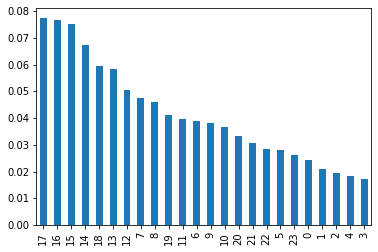

In [35]:
ax= df.Start_Time.dt.hour.value_counts(normalize=True)
ax.plot(kind="bar")
#showing the percentages of accidents by hour

- A high percentage of accidents occur in the afternoons between 2pm to 5pm(14:00 - 17:00). 
- 17:00 having highest number of accidents is a deadly hour

In which day of the week do most accidents occur?


In [36]:
day_acc=df.Start_Time.dt.dayofweek.value_counts()
day_acc

4    492074
3    463477
2    455037
1    443968
0    419821
5    311691
6    259274
Name: Start_Time, dtype: int64

Text(0, 0.5, 'Accident counts')

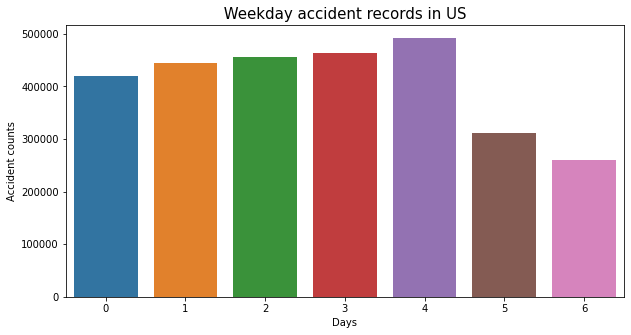

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(y=day_acc, x=day_acc.index)
plt.title(" Weekday accident records in US ",size=15,color="black")
plt.xlabel('Days')
plt.ylabel('Accident counts')

- The days are indexed 0,1,2,3,4,5,6 which correspomds to Sun. ,Mon. ,Tue. ,Wed. ,Thu. ,Fri. ,Sat. ,Sun. 
- Friday has the highest occurence of accidents
- There are lesser few accidents on weekdends compared to weekdays


Is the distribution of accidents by hour the same on the weekends as on weekdays?

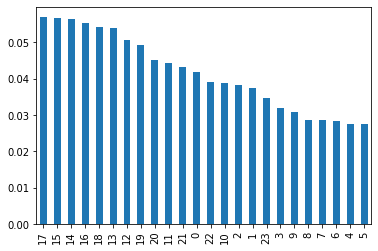

In [38]:
sundays_start_time=df.Start_Time[df.Start_Time.dt.dayofweek == 6]
(sundays_start_time.dt.hour.value_counts(normalize=True)).plot(kind="bar")

- On Sundays the peak occur between 14:00 - 17:00 , same as weekdays 
- Deadliest hour is still 17:00

In which month do most accidents occur?

In [39]:
month_acc=df.Start_Time.dt.month_name().value_counts()
month_acc

December     473943
November     360696
October      299131
September    241822
June         226561
January      198365
February     194995
May          181944
August       178670
April        171880
July         159111
March        158224
Name: Start_Time, dtype: int64

Text(0, 0.5, 'No. of accidents')

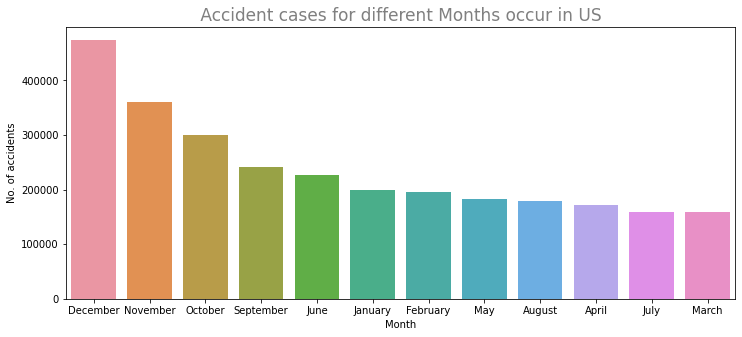

In [40]:
plt.figure(figsize=(12,5))
sns.barplot(y=month_acc, x=month_acc.index)
plt.title(" Accident cases for different Months occur in US ",size=17,color="grey")
plt.xlabel('Month')
plt.ylabel('No. of accidents')

- December had highest count, 473943 of accidents
- There is an increase in number of accidents from September to December (This is probably because of the winter season)

Which year had the most cases of accidents? 

In [41]:
year_acc=df.Start_Time.dt.year.value_counts()
year_acc

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Start_Time, dtype: int64

Text(0, 0.5, 'No. of accidents')

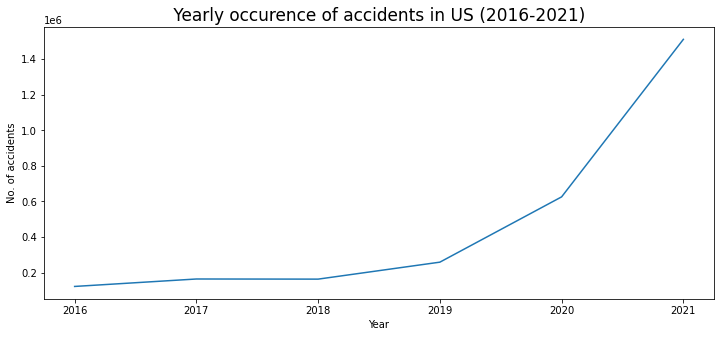

In [42]:
plt.figure(figsize=(12,5))
sns.lineplot(data=year_acc)
plt.title(" Yearly occurence of accidents in US (2016-2021) ",size=17,color="black")
plt.xlabel('Year')
plt.ylabel('No. of accidents')

- Maximum number of accidents of 1511745 was recorded in year 2021 
- The trend of accidents per year is increasing exponentially (with a sharp increase after 2020) 


Could 2016 have the lowest record of accidents in the trend?

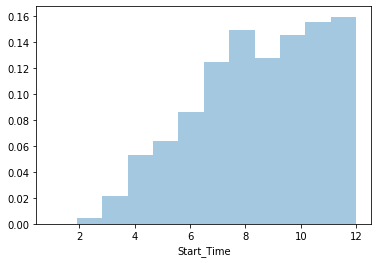

In [43]:
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

- There is a possibility that enough data was not collected for 2016

Is there any effect of temperature on accidents?

In [48]:
temp_acc=df["Temperature(F)"].value_counts()
temp_acc.sort_values().tail(10)

59.0    56025
66.0    56336
70.0    57760
64.0    57937
63.0    58259
68.0    58557
72.0    59681
75.0    60534
77.0    63575
73.0    64505
Name: Temperature(F), dtype: int64

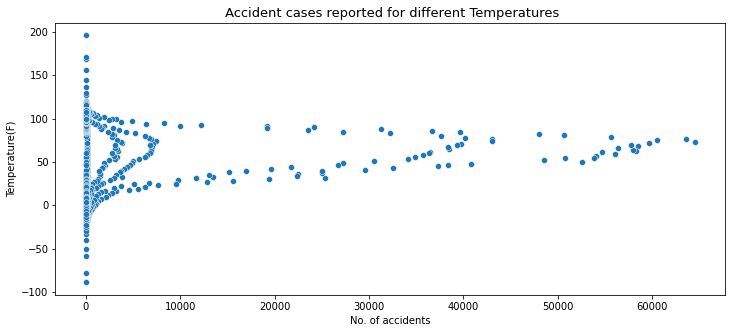

In [49]:
plt.figure(figsize=(12,5))
plt.title(" Accident cases reported for different Temperatures",size=13,color="black")
plt.xlabel('No. of accidents')
plt.ylabel('Temperature(F)')
sns.scatterplot(y=temp_acc.index, x=temp_acc)

- The scatter plot above shows that high accidents occur between ranges of lower temperatures and higher temperatures .
- Most accidents occured at temperature of 73.0 F

What is the effect of humidity on accidents?

In [55]:
hum_acc=df["Humidity(%)"].value_counts()
hum_acc.sort_values().tail()

89.0      53396
90.0      57587
87.0      60236
100.0     96907
93.0     103607
Name: Humidity(%), dtype: int64

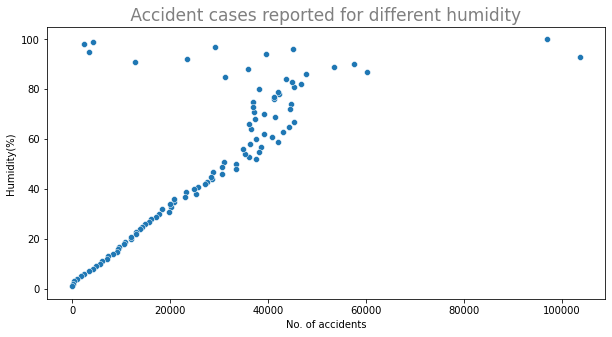

In [56]:
plt.figure(figsize=(10,5))
plt.title(" Accident cases reported for different humidity ",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Humidity(%) ')
sns.scatterplot(y=hum_acc.index, x=hum_acc)

- There is a linear relationship between humidity and number of accidents.
- As humidity increases, number of accidents also increases

In [54]:
x = df.groupby("Severity")["Temperature(F)","Wind_Chill(F)","Humidity(%)","Visibility(mi)"].mean()
x

,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi)
Severity,,,,
1,71.257955,70.929767,49.972549,9.530788
2,61.868632,60.014508,64.364753,9.079442
3,61.920769,54.569440,64.150354,9.355606
4,58.275355,51.276253,67.544336,9.095082


- There is long delay in traffic when humidity is high. 
- Visibility does not have much impact on traffic hence is not a key impact for accidents.

What was the weather conditions in accident cases?

In [59]:
weather_acc=df["Weather_Condition"].value_counts()
weather=weather_acc.head(10)
weather

Fair                1107194
Mostly Cloudy        363959
Cloudy               348767
Partly Cloudy        249939
Clear                173823
Light Rain           128403
Overcast              84882
Scattered Clouds      45132
Light Snow            43752
Fog                   41226
Name: Weather_Condition, dtype: int64

Text(0, 0.5, 'No. of accidents')

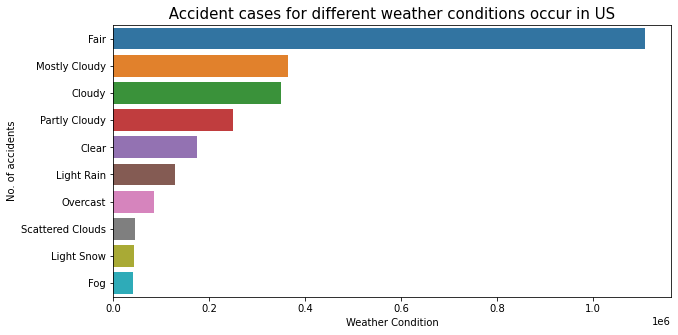

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x=weather, y=weather.index)
plt.title(" Accident cases for different weather conditions occur in US ",size=15,color="black")
plt.xlabel('Weather Condition')
plt.ylabel('No. of accidents')

- Weather condition was fair in most cases, hence no cause for accidents in most cases

#Summary and Conclusion 

Insights:
- Severity with mean ~2, meaning accidents didn't have much impact on traffic.
- Less than 4% of cities have more than 1000 yearly accidents.
- About 1100 cities have reported just one accident within time frame of 2016-2021.
- Miami has largest count of accidents with count of 106966, with Los Angeles and Orlando following suit.
-Carlifornia,Florida and Texas are top 3 states with highest number of accidents.  
- Highest percentages occured in the afternoons between 2pm -5pm
- The most dangerous period for drivers from September to December(the winter months)
- Accident cases are less on weekdays than on weekends
- There are two peaks during the day; in the morning and evening. More accidents occur in the evening probably because drivers are more exhausted from work, as a result are less focused. 
- Trend of accidents rises exponentially with 2021 having the highest record of 1511745. 
- There seem to be missing data from 2016 (which might be agreeable because the recording startedat that year). 
- Number of accidents increases as humidity increases 
- Visibility does not have much impact on traffic hence is not a key reason for accidents . 
- Weather condition was fair in most cases, hence no cause for accidents in most cases